# Data Exploration and Visualization on Programme for International Student Assessment (PISA) 2012 Survey
## by Chloe McAuley

## Preliminary Wrangling

This dataset contains a survey of the skills and knowledge the student's possess as they reach the end of their compulsory education. This survey investigates how well students are for a life beyond school. 

Around 510,000 students in 65 economies took put in the survey which assesses reading, mathematics, and science representing 28 million 15 year olds, globally. Out of the 65 economies, 44 took part in an assessment of creative problem solving, and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Gathering Data <a class="anchor" id="gathering"></a>

In [2]:
df = pd.read_csv(r"C:\Users\Barry\Desktop\Udacity Project\pisa2012.csv",encoding='latin-1')

C:\Users\Barry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Assessing Data <a class="anchor" id="Assessing"></a>

In [3]:
#expand the columns so all text can be read

pd.set_option('display.max_columns', None)
df.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [4]:
#what is the shape of the dataframe?
df.shape

(485490, 636)

Since there are 636 columns, I will only select a few relevant columns for this project. 

In [5]:
#create a copy of the df to ensure that the original is intact.
df_clean = df.copy()

In [6]:
#rename the columns from codes into something more readable.
df_clean.rename(columns={"NC": "country", "SCHOOLID": "school_ID", "STIDSTD":"student_ID",
                        "ST01Q01":"international_grade","ST02Q01": "national_programme", 
                        "ST04Q01":"gender","ST08Q01":"late_for_school","ST09Q01":"skip_school",
                        "ST115Q01":"skip_class","ST20Q01":"birth_country_self",
                        "ST20Q02":"birth_country_mother","ST20Q03":"birth_country_father",
                        "PV1MATH": "math_grade_1","PV2MATH": "math_grade_2","PV3MATH": "math_grade_3","PV4MATH": "math_grade_4",
                        "PV5MATH": "math_grade_5","PV1READ": "read_grade_1","PV2READ": "read_grade_2","PV3READ": "read_grade_3",
                        "PV4READ": "read_grade_4","PV5READ": "read_grade_5","PV1SCIE": "science_grade_1","PV2SCIE": "science_grade_2",
                        "PV3SCIE": "science_grade_3", "PV4SCIE": "science_grade_4", "PV5SCIE": "science_grade_5","IMMIG":"immigration",
                        "ST80Q01": "teacher_encourage_reflection","ST80Q04": "problems_thinking","ST80Q05": "own_procedures",
                        "ST80Q06": "problems_no_obvious_solutions","ST80Q07": "problems_different_contexts",
                        "ST80Q08": "learn_mistakes","ST80Q09": "asks_explanations","ST80Q10": "applications",
                        "ST80Q11": "problems_multiple_solutions","ST87Q01":"outsider","ST87Q02":"make_friends","ST87Q03":"belonging",
                        "ST87Q04":"feeling_awkard","ST87Q05":"liked","ST87Q06":"feeling_lonely","ST87Q07":"feeling_happy",
                        "ST87Q08":"ideal_school","ST87Q09":"satisfication","ST88Q01":"little_prep","ST88Q02":"waste_time",
                        "ST88Q03":"confidence","ST88Q04":"useful_job","ST89Q02":"helps_job","ST89Q03":"prep_college",
                        "ST89Q04":"enjoy_grades","ST89Q05":"try_hard"},  inplace = True)

In [7]:
#calculate the average of the maths, science, and reading grades. Put the averages into a new column 
df_clean["maths_avg"] = df_clean[["math_grade_1","math_grade_2","math_grade_3","math_grade_4","math_grade_5"]].mean(axis=1)
df_clean["read_avg"] = df_clean[["read_grade_1","read_grade_2","read_grade_3","read_grade_4","read_grade_5"]].mean(axis=1)
df_clean["sci_avg"] = df_clean[["science_grade_1","science_grade_2","science_grade_3","science_grade_4","science_grade_5"]].mean(axis=1)

In [8]:
#only include the columns which are relevant 
df_clean = df_clean[["student_ID","country","OECD","international_grade","gender","immigration","maths_avg","sci_avg","read_avg",
                    "late_for_school","skip_school","teacher_encourage_reflection","problems_thinking","own_procedures",
                    "problems_no_obvious_solutions","problems_different_contexts","learn_mistakes","asks_explanations",
                    "applications","problems_multiple_solutions","outsider","make_friends","belonging",
                    "feeling_awkard","liked","feeling_lonely","feeling_happy","ideal_school","satisfication","little_prep",
                    "waste_time","confidence","useful_job","helps_job","prep_college","enjoy_grades","try_hard"]]

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   student_ID                     485490 non-null  int64  
 1   country                        485490 non-null  object 
 2   OECD                           485490 non-null  object 
 3   international_grade            485490 non-null  int64  
 4   gender                         485490 non-null  object 
 5   immigration                    471793 non-null  object 
 6   maths_avg                      485490 non-null  float64
 7   sci_avg                        485490 non-null  float64
 8   read_avg                       485490 non-null  float64
 9   late_for_school                479143 non-null  object 
 10  skip_school                    479131 non-null  object 
 11  teacher_encourage_reflection   314171 non-null  object 
 12  problems_thinking             

In [10]:
#are there any duplicated rows?
df_clean.duplicated().sum()

0

In [11]:
#how many countries are there in the dataframe?
df_clean["country"].nunique()

66

In [12]:
#how many students are there in each country?
df_clean.country.value_counts()

Mexico                       33806
Italy                        31073
Spain                        25313
Canada                       21544
Brazil                       19204
                             ...  
New Zealand                   4291
Iceland                       3508
United Kingdom (Scotland)     2945
Perm (Russian Federation)     1761
Liechtenstein                  293
Name: country, Length: 66, dtype: int64

In [13]:
#how many male and females are there in the dataframe?
df_clean.gender.value_counts()

Female    245064
Male      240426
Name: gender, dtype: int64

In [14]:
#the range of international grades
df_clean.international_grade.value_counts()

10    262631
9     152850
11     38397
8      23764
7       3536
12      3436
96       873
13         3
Name: international_grade, dtype: int64

## Cleaning <a class="anchor" id="cleaning"></a>

1) Countries have spaces at the end, this makes it difficult to search for these countries, spaces at the end need to be removed. 

2) Vietnam is spelled "Viet Nam", this needs to be fixed.

3) United States of America, Colombia, Latvia, and Lithuania should only have OECD status. Not Non-OECD status. Change it. 

4) There are 484,617 international grades lie between 0 and 20. 873 lie between 80 and 100. This looks like a mistake and a decimal has not been put into the correct place. 

In [15]:
#1. Remove the end spaces from the countries

df_clean["country"] = df_clean.country.str.rstrip()

In [16]:
#2. Change Viet Nam to Vietnam

df_clean.loc[df_clean['country'] == "Viet Nam", ['country']] = 'Vietnam'

In [17]:
#3. Change United States of America, Colombia, Latvia, and Lithuania to only having OECD status

df_clean.loc[df_clean['country'] == "United States of America", ['OECD']] = 'OECD'
df_clean.loc[df_clean['country'] == "Colombia", ['OECD']] = 'OECD'
df_clean.loc[df_clean['country'] == "Latvia", ['OECD']] = 'OECD'
df_clean.loc[df_clean['country'] == "Lithuania", ['OECD']] = 'OECD'

In [18]:
#4. Correct the international grades of 96 to 9.6. 

df_clean.loc[df_clean['international_grade'] == 96, ['international_grade']] = 9.6
df_clean["international_grade"] = df_clean["international_grade"].astype("float64")

In [19]:
df_clean.head()

,student_ID,country,OECD,international_grade,gender,immigration,maths_avg,sci_avg,read_avg,late_for_school,skip_school,teacher_encourage_reflection,problems_thinking,own_procedures,problems_no_obvious_solutions,problems_different_contexts,learn_mistakes,asks_explanations,applications,problems_multiple_solutions,outsider,make_friends,belonging,feeling_awkard,liked,feeling_lonely,feeling_happy,ideal_school,satisfication,little_prep,waste_time,confidence,useful_job,helps_job,prep_college,enjoy_grades,try_hard
0,1,Albania,Non-OECD,10.0,Female,Native,366.18634,371.91348,261.01424,None,None,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,Agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Strongly disagree,Agree,Agree,Strongly agree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly agree,Strongly agree
1,2,Albania,Non-OECD,10.0,Female,Native,470.56396,478.12382,384.68832,One or two times,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Albania,Non-OECD,9.0,Female,Native,505.53824,486.60946,405.18154,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Albania,Non-OECD,9.0,Female,Native,449.45476,453.97240,477.46376,None,None,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Albania,Non-OECD,9.0,Female,Native,385.50398,367.15778,256.01010,One or two times,None,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


### What is the structure of your dataset?

There are 485,490 students who answered 636 approximately questions in the survery. There is an abundance of data that was recorded, such as who they had at home, did they speak the same language at home as in the test, were the students immigrants, were their families immigrants, how enthusiatic were they about maths, english and science, what were their family and friends' views upon these subjects, did they have much wealth at home, what were their teachers like, what grades did they receive, etc. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested in exploring if the OECD status countries have a better academic record than non-OECD countries. I also want to explore how well the countries did in maths, science and reading. In addition to this, I wanted to investigate further how activiating their cognitive skills, their attitude towards school, their sense of belonging at school, and how truancy impacts their grades. 


## Univariate Exploration

Firstly, we have to see if there are any outliers in the international grade. 

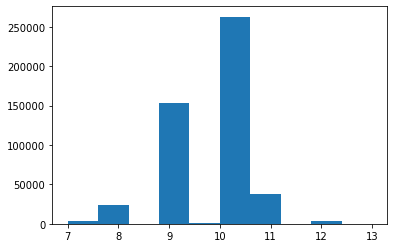

In [20]:
#distribution of international grades 
plt.hist(data = df_clean, x = "international_grade");

There are no outliers in international grades because it was corrected beforehand. 

Now, we look at the how many non-OECD and OECD countries participated in this survey. 

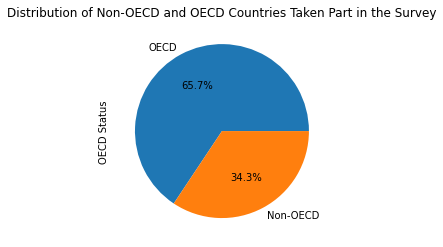

In [21]:
#the distribution of non-OECD and OECD countries taken part in the survey
df_clean.OECD.value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title("Distribution of Non-OECD and OECD Countries Taken Part in the Survey")
plt.ylabel("OECD Status");

There are a large disproportionate number of countries with the OECD status. 

Now, I would like to investigate the average international grades from both OECD and non-OECD countries. 

In [22]:
#creating a dataframe that has taken the average of OECD and Non-OECD stats
OECD_df = df_clean.groupby("OECD").mean()
OECD_df

,student_ID,international_grade,maths_avg,sci_avg,read_avg
OECD,,,,,
Non-OECD,3874.865646,9.612754,439.410599,443.295494,439.942991
OECD,7316.094017,9.681612,485.473322,492.818889,488.783034


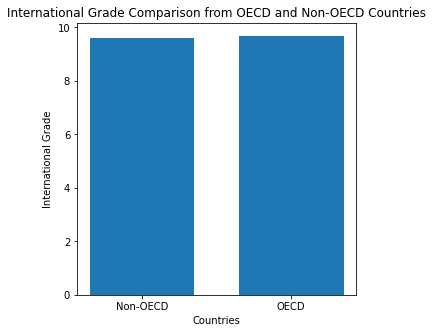

In [23]:
#create a bar chart to compare international grades from OECD and non-OECD countries
plt.rcParams['figure.figsize']=(5,5)
x = OECD_df.index
y = OECD_df["international_grade"]
plt.bar(x,y,width=[0.7])
plt.title("International Grade Comparison from OECD and Non-OECD Countries")
plt.xlabel("Countries")
plt.ylabel("International Grade")

plt.show()

The international grade for the non-OECD and OECD countries look similar, therefore, we will not go any further with this.

Now, we want to see the international grades for each country. 

In [24]:
#group together the countries and find their mean international, maths, science, and reading grades. 

df_country = df_clean.groupby("country").mean()
df_country

,student_ID,international_grade,maths_avg,sci_avg,read_avg
country,,,,,
Albania,2372.000000,9.598777,394.878912,398.916529,396.250245
Argentina,2954.500000,9.593433,395.635711,410.478404,403.596060
Australia,7241.000000,10.076031,493.268939,511.638212,501.056931
Austria,2378.000000,9.492955,507.778785,508.036810,491.485551
Belgium,4299.000000,9.581877,519.668410,510.302595,512.281728
...,...,...,...,...,...
United Kingdom (Scotland),6855.258744,11.056027,499.348747,514.260414,506.973700
United Kingdom (excl.Scotland),6170.756949,11.188079,486.806875,508.199218,495.365809
United States of America,1662.819701,10.078978,485.905804,501.903598,503.228908


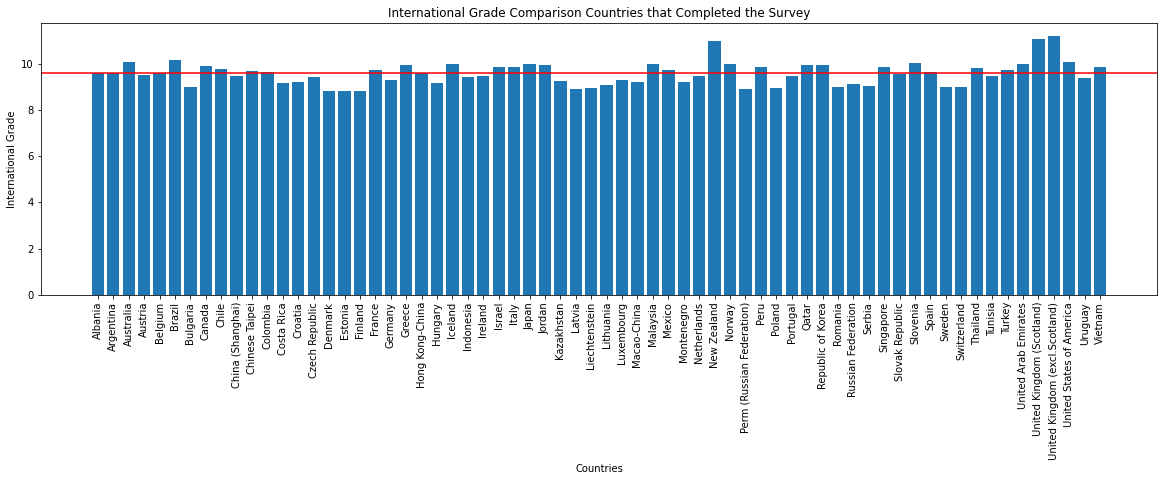

In [25]:
#compare each country's international grade by plotting a bar chart. 

plt.rcParams['figure.figsize']=(20,5)
x = df_country.index
y = df_country["international_grade"]
ind = np.arange(len(x))
plt.bar(x,y)
plt.title("International Grade Comparison Countries that Completed the Survey")
plt.xticks(x, rotation = 90)
plt.xlabel("Countries")
plt.ylabel("International Grade")
plt.axhline(y= df_country["international_grade"].mean(), 
            xmin="Albania", xmax="Vietnam", color = "r")

plt.show()


The top 3 countries with the highest international grades are the United Kingdom without Scotland (with a grade of 11.19), Scotland, and New Zealand (all OECD countries). The lowest score came with 8.79 came from Estonia, and the average score was 9.64. The highest scoring country from a non-OECD country was Brazil with an international grade of 10.14. This was higher than the average international and lowest score from OECD countries. The average score for the non-OECD country was found to be 9.48, and lowest score from Perm was 8.89. Again, Perm scored higher than Estonia, which indicates that there is not much difference in international grades between OECD and non-OECD countries. 

Next, we use a series of histograms to check if the maths, reading, and science grades have any major outliers. 

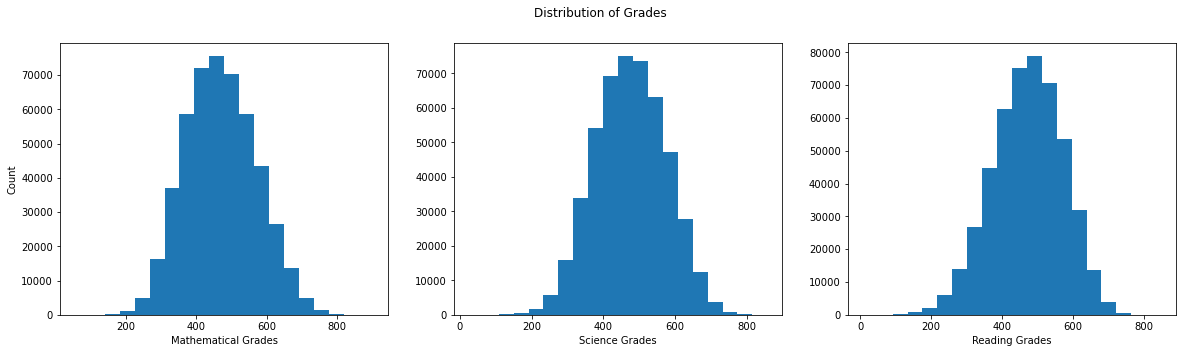

In [26]:
#distribution of maths, science, and reading grades. 

plt.rcParams['figure.figsize']=(20,5)
plt.subplot(1,3,1)
plt.suptitle("Distribution of Mathematics Grades")
plt.xlabel("Mathematical Grades")
plt.ylabel("Count")
plt.hist(data = df_clean, x = "maths_avg", bins = 20)

plt.rcParams['figure.figsize']=(20,5)
plt.subplot(1,3,2)
plt.suptitle("Distribution of Science Grades")
plt.xlabel("Science Grades")
plt.hist(data = df_clean, x = "sci_avg", bins = 20)

plt.rcParams['figure.figsize']=(20,5)
plt.subplot(1,3,3)
plt.suptitle("Distribution of Grades")
plt.xlabel("Reading Grades")
plt.hist(data = df_clean, x = "read_avg", bins = 20);

The distribution of all grades is around 100-800 and the majority of the grades occur around 400-500. There are no major outliers shown. 

Now, I would like to see the distribtuion of students from each country.

In [27]:
#group together the countries and find how many students in each country that has completed the survey.

students_count_df = df_clean.groupby("country").count()
students_count_df

,student_ID,OECD,international_grade,gender,immigration,maths_avg,sci_avg,read_avg,late_for_school,skip_school,teacher_encourage_reflection,problems_thinking,own_procedures,problems_no_obvious_solutions,problems_different_contexts,learn_mistakes,asks_explanations,applications,problems_multiple_solutions,outsider,make_friends,belonging,feeling_awkard,liked,feeling_lonely,feeling_happy,ideal_school,satisfication,little_prep,waste_time,confidence,useful_job,helps_job,prep_college,enjoy_grades,try_hard
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,4743,4743,4743,4743,4343,4743,4743,4743,4431,4408,2661,2658,2637,2644,2641,2641,2627,2626,2645,2659,2663,2640,2634,2628,2648,2637,2659,2663,2654,2658,2656,2670,2668,2666,2669,2671
Argentina,5908,5908,5908,5908,5799,5908,5908,5908,5817,5855,3782,3759,3729,3722,3733,3736,3751,3728,3725,3665,3717,3660,3684,3673,3669,3655,3664,3701,3703,3678,3694,3710,3697,3680,3677,3682
Australia,14481,14481,14481,14481,13544,14481,14481,14481,14186,14177,9321,9315,9300,9287,9298,9291,9256,9292,9299,9288,9299,9254,9281,9274,9280,9257,9245,9263,9302,9292,9291,9297,9302,9306,9296,9301
Austria,4755,4755,4755,4755,4695,4755,4755,4755,4721,4721,3096,3092,3087,3088,3086,3082,3091,3095,3087,3112,3106,3108,3097,3105,3096,3102,3098,3102,3105,3110,3092,3097,3108,3088,3104,3106
Belgium,8597,8597,8597,8597,8382,8597,8597,8597,8505,8505,5424,5415,5400,5388,5398,5400,5378,5381,5391,5428,5426,5408,5398,5377,5415,5367,5382,5375,5392,5378,5383,5394,5408,5389,5414,5393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom (Scotland),2945,2945,2945,2945,2867,2945,2945,2945,2913,2911,1933,1934,1932,1935,1933,1933,1933,1928,1931,1931,1935,1922,1926,1922,1927,1927,1926,1931,1934,1931,1933,1929,1925,1928,1927,1922
United Kingdom (excl.Scotland),9714,9714,9714,9714,9502,9714,9714,9714,9602,9592,6349,6345,6324,6317,6323,6336,6310,6314,6331,6317,6321,6296,6299,6291,6312,6290,6278,6295,6320,6305,6327,6315,6319,6311,6310,6313
United States of America,10294,10294,10294,10294,10004,10294,10294,10294,10185,10202,6694,6688,6671,6656,6662,6666,6661,6651,6663,6653,6664,6639,6627,6624,6627,6638,6616,6633,6619,6608,6599,6601,6612,6610,6604,6602


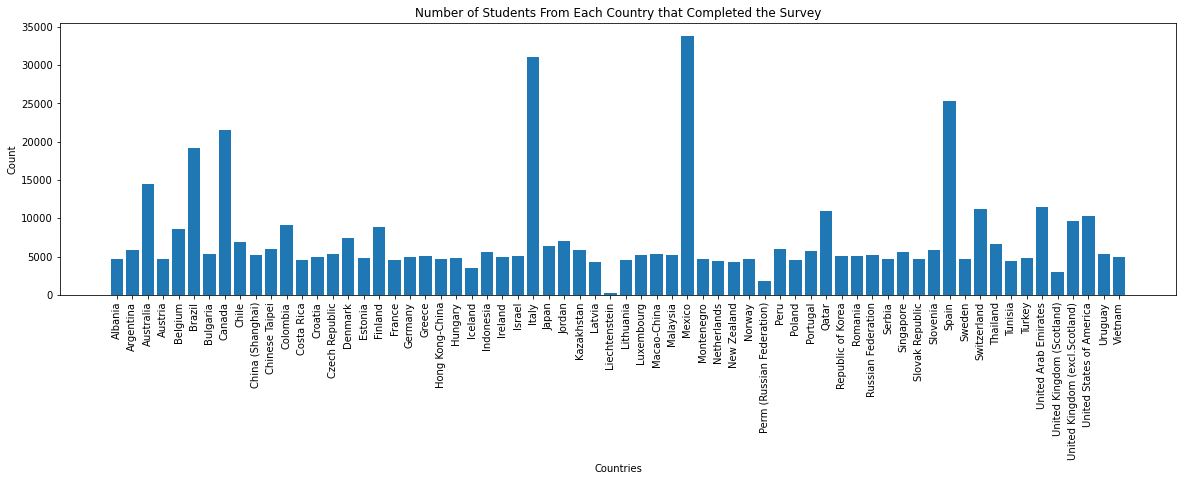

In [28]:
#plot a barchart comparing how many students have taken part in the survey for each country

plt.rcParams['figure.figsize']=(20,5)
x = students_count_df.index
y = students_count_df["student_ID"]
ind = np.arange(len(x))
plt.bar(x,y)
plt.title("Number of Students From Each Country that Completed the Survey")
plt.xticks(x, rotation = 90)
plt.xlabel("Countries")
plt.ylabel("Count")

plt.show()

As you can see from the graph above, Mexico, Italy, and Spain are the countries with the most participants. 

Now, I would like to see the distribution between males and females who have taken part in the survey. 

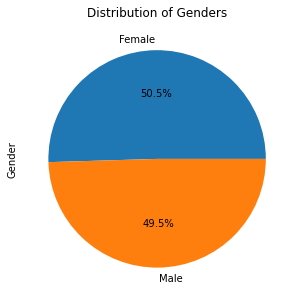

In [29]:
#plot the distribution of genders in a pie chart. 

df_clean.gender.value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title("Distribution of Genders")
plt.ylabel("Gender");


The pie chart shows that there is a balance of genders who partaken in the survey, which minimises biases within the data. 

Now, we would like to see what the immigration staus of the participants. 

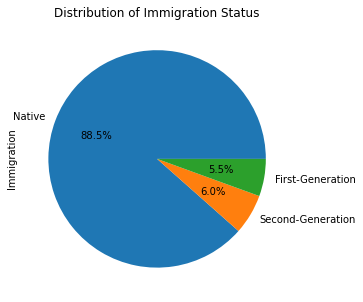

In [30]:
#plot the distribution of immigrants in a pie chart. 

df_clean.immigration.value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title("Distribution of Immigration Status")
plt.ylabel("Immigration");

A high percentage of native students have partaken in this survery 88.5%, with first-generation and second-generation immigrants are the minority. 

Next, we would like to see how many students are late for school/skip school.

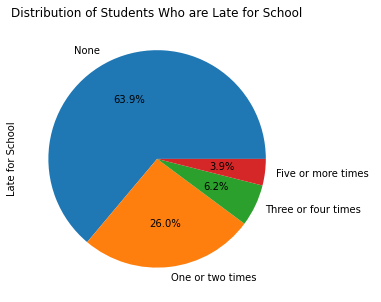

In [31]:
#how many students are late for school?
df_clean.late_for_school.value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title("Distribution of Students Who are Late for School")
plt.ylabel("Late for School");

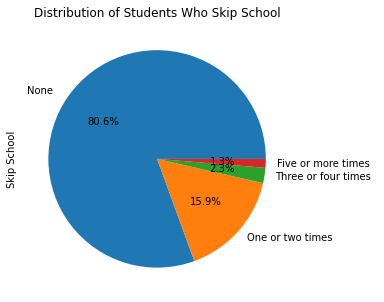

In [32]:
#how many students skip school?
df_clean.skip_school.value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title("Distribution of Students Who Skip School")
plt.ylabel("Skip School");

The majority of students are never late and do not skip school. Whilst the percentage of students who are often late and skip school are around 3.9% and 1.3%, respectively. 

## Bivariate Exploration

I am interested to investigate which country, gender, and immigration status produces the best grades. 

#### Country and Grades

First, I will look at the mathematics, science, and reading grades for each country that took part in the survey. 

In [33]:
#change the table from three subject column to one. 

subject_melt_df = pd.melt(df_clean, id_vars=["student_ID", "country","gender", "immigration","late_for_school","skip_school",
                                             "teacher_encourage_reflection","problems_thinking","own_procedures",
                                             "problems_no_obvious_solutions","problems_different_contexts","learn_mistakes",
                                             "asks_explanations","applications","problems_multiple_solutions","outsider",
                                             "make_friends","belonging","feeling_awkard","liked","feeling_lonely",
                                             "feeling_happy","ideal_school","satisfication","little_prep","waste_time",
                                             "confidence","useful_job","helps_job","prep_college","enjoy_grades","try_hard"], 
               value_vars=["maths_avg","sci_avg","read_avg"], 
               var_name="subject", value_name='grade')
subject_melt_df['subject'] = subject_melt_df['subject'].replace("maths_avg", "Mathematics").replace("read_avg",'Reading').replace("sci_avg","Science")
subject_melt_df

,student_ID,country,gender,immigration,late_for_school,skip_school,teacher_encourage_reflection,problems_thinking,own_procedures,problems_no_obvious_solutions,problems_different_contexts,learn_mistakes,asks_explanations,applications,problems_multiple_solutions,outsider,make_friends,belonging,feeling_awkard,liked,feeling_lonely,feeling_happy,ideal_school,satisfication,little_prep,waste_time,confidence,useful_job,helps_job,prep_college,enjoy_grades,try_hard,subject,grade
0,1,Albania,Female,Native,None,None,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,Agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Strongly disagree,Agree,Agree,Strongly agree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly agree,Strongly agree,Mathematics,366.18634
1,2,Albania,Female,Native,One or two times,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathematics,470.56396
2,3,Albania,Female,Native,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathematics,505.53824
3,4,Albania,Female,Native,None,None,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathematics,449.45476
4,5,Albania,Female,Native,One or two times,None,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Mathematics,385.50398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456465,4955,Vietnam,Female,Native,One or two times,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,472.61846
1456466,4956,Vietnam,Male,Native,One or two times,None,Sometimes,Never or rarely,Often,Sometimes,Sometimes,Sometimes,Often,Often,Sometimes,Disagree,Agree,NaN,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Strongly disagree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Reading,487.24356
1456467,4957,Vietnam,Male,Native,None,None,Often,Sometimes,Never or rarely,Never or rarely,Sometimes,Sometimes,Often,Sometimes,Often,Strongly disagree,Strongly agree,Agree,Disagree,Disagree,Disagree,Agree,Agree,Agree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Disagree,Agree,Reading,476.25694
1456468,4958,Vietnam,Male,Native,None,None,Sometimes,Never or rarely,Sometimes,Often,Always or almost always,Often,Always or almost always,Often,Always or almost always,Strongly disagree,Agree,Disagree,Strongly disagree,Disagree,Strongly disagree,Agree,Agree,Agree,Disagree,Strongly disagree,Agree,Agree,Agree,Strongly agree,Agree,Strongly agree,Reading,518.43922


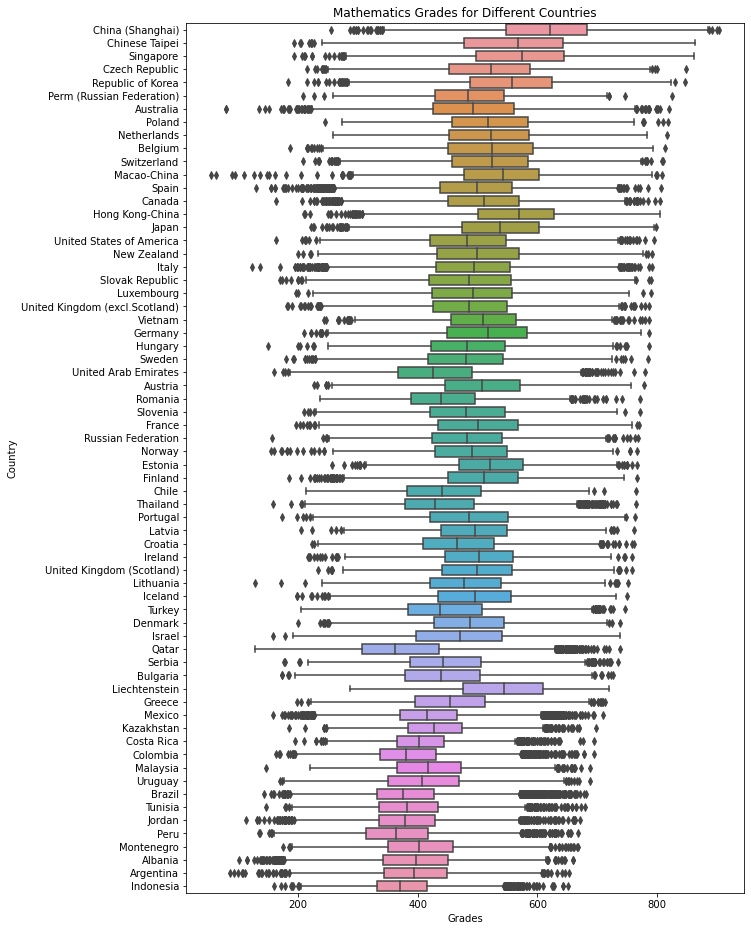

In [34]:
#gather only maths grades in the dataframe.

maths_grades = subject_melt_df.query('subject == "Mathematics"')
maths_grades = maths_grades.sort_values(by=['grade'], ascending = False)
maths_grades

#plot a box plot to compare countries and their maths grades. 

plt.figure(figsize = [10, 16])
sb.boxplot(x = maths_grades['grade'], y = maths_grades['country']);
plt.title('Mathematics Grades for Different Countries')
plt.xlabel("Grades")
plt.ylabel("Country");

It is shown in the graph above that China (Shanghai) had the best grades in maths. Liechtenstein also had a high mean grade comparable to China but the very top grade was poor compared to other countries. It looks like the top countries that did well in mathematical subjects were mostly East Asian countries. United Arab Emirates and Qatar had poor average grades in mathematics compared to other countries. 

Now, I would like to investigate which countries did well in science. 

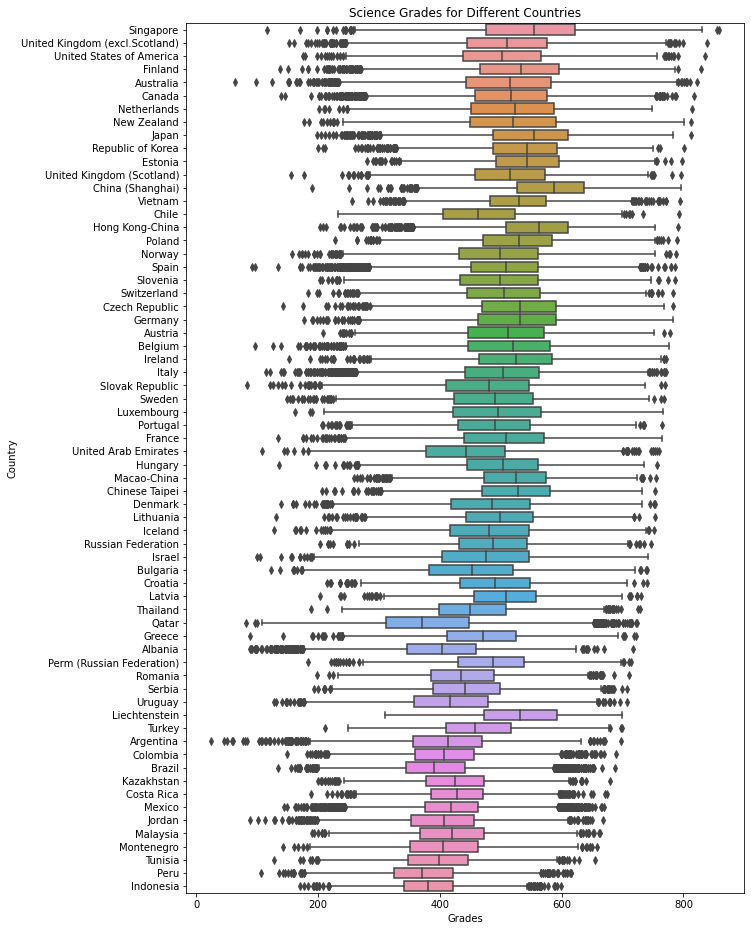

In [35]:
#gather only science grades in the dataframe.

sci_grades = subject_melt_df.query('subject == "Science"')
sci_grades = sci_grades.sort_values(by=['grade'], ascending = False)
sci_grades

#plot a box plot to compare countries and their science grades. 

plt.figure(figsize = [10, 16])
sb.boxplot(x = sci_grades['grade'], y = sci_grades['country']);
plt.title('Science Grades for Different Countries')
plt.xlabel("Grades")
plt.ylabel("Country");

In science, China (Shanghai) and Liechtenstein have very high average science scores. Singapore has the highest score and one of the highest average scores. United Kingdom, United States of America, Finland and Canada have the best grades in science. It looks like more weathly countries do well in science, this may be due to the investment in science experiments is higher than other countries. Qatar, Chile, and United Arab Emirates have the lowest mean score. 

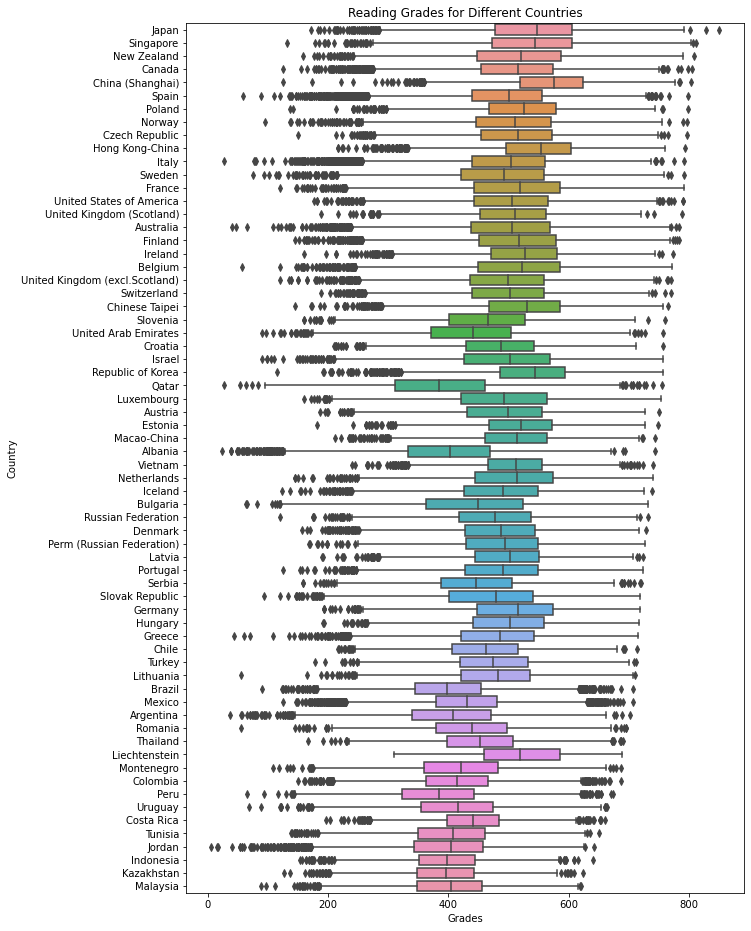

In [36]:
#gather only reading grades in the dataframe.

read_grades = subject_melt_df.query('subject == "Reading"')
read_grades = read_grades.sort_values(by=['grade'], ascending = False)
read_grades

#plot a box plot to compare countries and their reading grades. 

plt.figure(figsize = [10, 16])
sb.boxplot(x = read_grades['grade'], y = read_grades['country']);
plt.title('Reading Grades for Different Countries')
plt.xlabel("Grades")
plt.ylabel("Country");

From the graph above, China (Shanghai) has the highest mean score in reading. However, Japan, Singapore, New Zealand, and Canada have the best student scores in reading. Qatar and Albania have really low average and lowest scores in reading. 

Now, I would like to compare the grades between genders. 



#### Gender and Grades

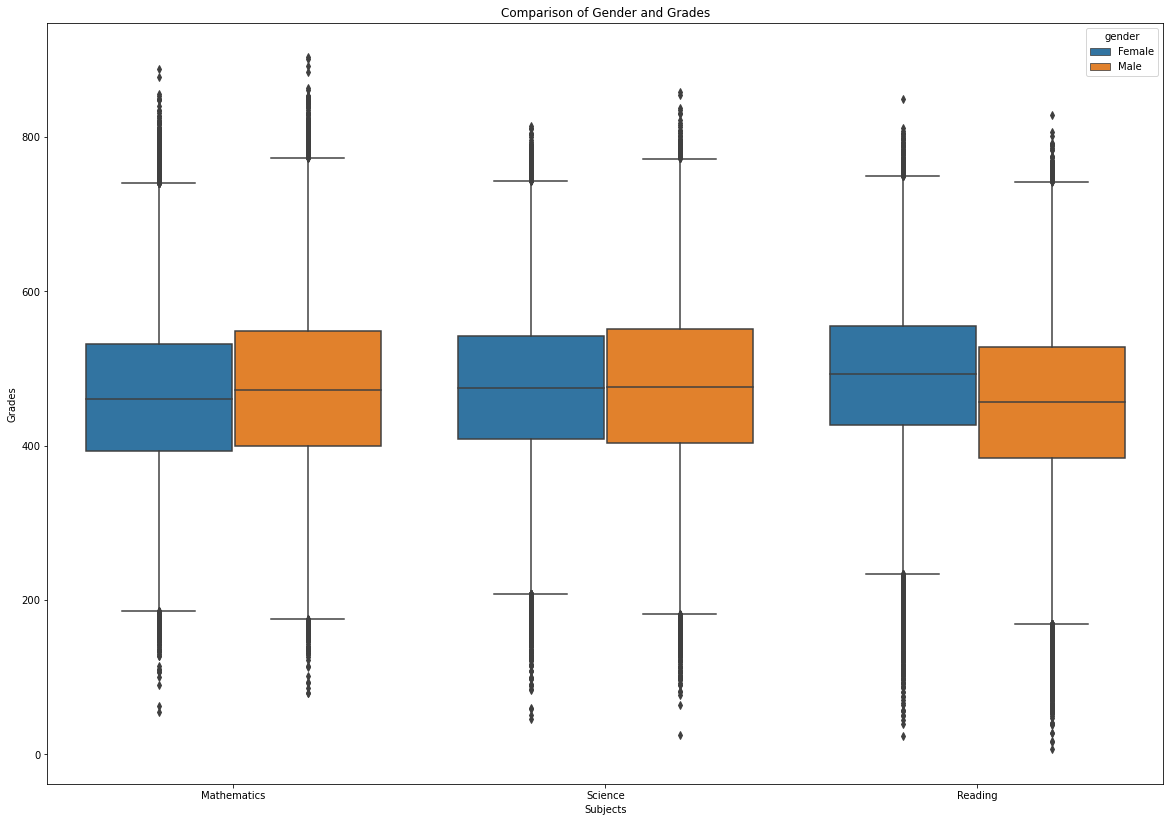

In [53]:
#plot a box plot to compare gender with grades

plt.figure(figsize=[20, 14]);
sb.boxplot(x = subject_melt_df['subject'], y = subject_melt_df['grade'], hue=subject_melt_df['gender'])
plt.title("Comparison of Gender and Grades")
plt.xlabel("Subjects")
plt.ylabel("Grades");

From the graph above, females do worse in maths but better in reading than males. However, their mean grades in science are the same. 

Next, I would like to compare immigration status and grades. 

#### Immigration Status and Grades

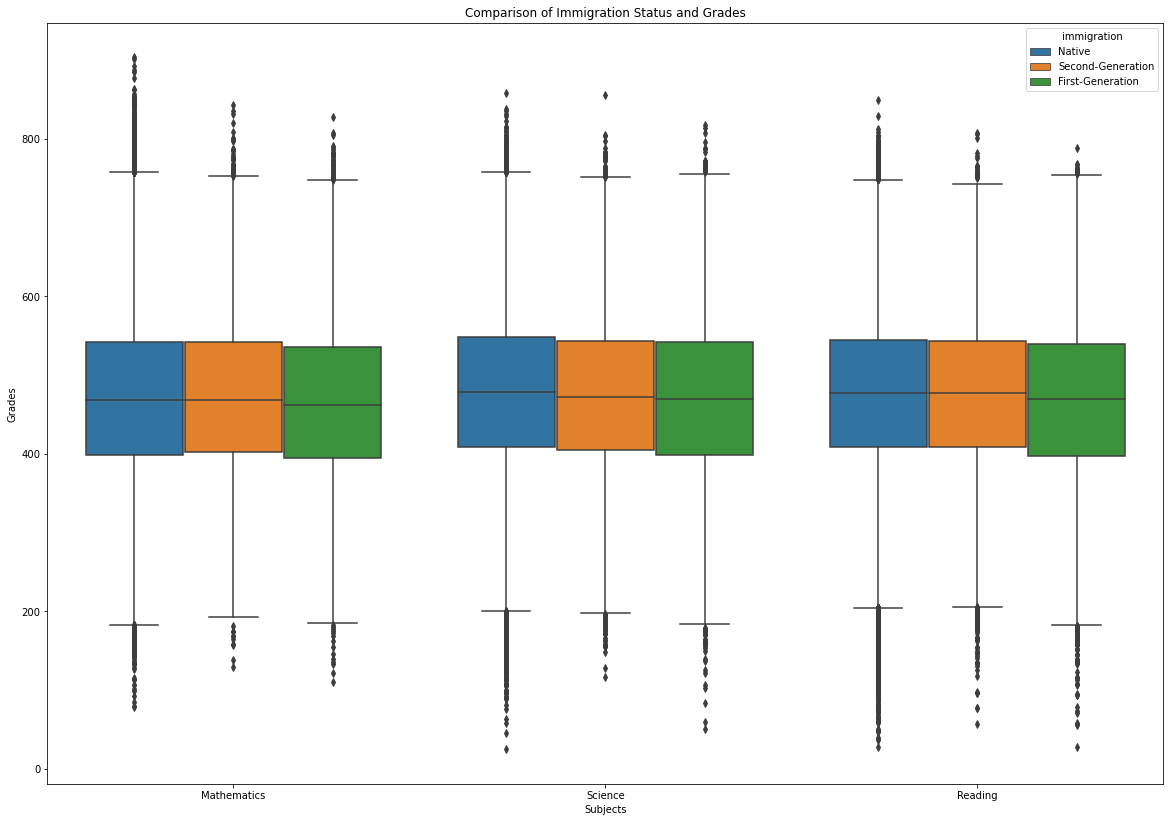

In [38]:
#plot a box plot to compare immigration status with grades

plt.figure(figsize=[20, 14]);
sb.boxplot(x = subject_melt_df['subject'], y = subject_melt_df['grade'], hue=subject_melt_df['immigration'])
plt.title("Comparison of Immigration Status and Grades")
plt.xlabel("Subjects")
plt.ylabel("Grades");

For reading and mathematics, the average for native and second-generations are the same and the first generation have a lower mean score. For science subjects, the native students do better than the first and second generation immigrants, where the first generation struggle the most with science. The native and second generation may have comparable mean scores because they would be fluent at their language comapred to first generation immigrants. 

## Multivariate Exploration

I am interested in how cognitive activation, sense of belonging, attitude towards school, and truancy is affecting the students' grades. 

#### Cognitive Activation and Grades

In [39]:
#create a dataframe for congitive activation and grades

cog_activation = pd.melt(df_clean, id_vars=["student_ID","country","teacher_encourage_reflection","problems_thinking","own_procedures",
                    "problems_no_obvious_solutions","problems_different_contexts","learn_mistakes","asks_explanations",
                    "applications","problems_multiple_solutions"], 
               value_vars=["maths_avg","sci_avg","read_avg"], 
               var_name="subject", value_name='grade')
cog_activation['subject'] = cog_activation['subject'].replace("maths_avg", "Mathematics").replace("read_avg",'Reading').replace("sci_avg","Science")

In [40]:
#create ordered categorical data 

ordinal_var_dict = {'teacher_encourage_reflection': ['Always or almost always','Often','Sometimes','Never or rarely'],
                    'problems_thinking': ['Always or almost always','Often','Sometimes','Never or rarely'],
                    'own_procedures': ['Always or almost always','Often','Sometimes','Never or rarely'],
                   "problems_no_obvious_solutions": ['Always or almost always','Often','Sometimes','Never or rarely'],
                   "problems_different_contexts": ['Always or almost always','Often','Sometimes','Never or rarely'],
                   "learn_mistakes" : ['Always or almost always','Often','Sometimes','Never or rarely'],
                   "asks_explanations": ['Always or almost always','Often','Sometimes','Never or rarely'],
                   "applications": ['Always or almost always','Often','Sometimes','Never or rarely'],
                   "problems_multiple_solutions" : ['Always or almost always','Often','Sometimes','Never or rarely']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    cog_activation[var] = cog_activation[var].astype(ordered_var)

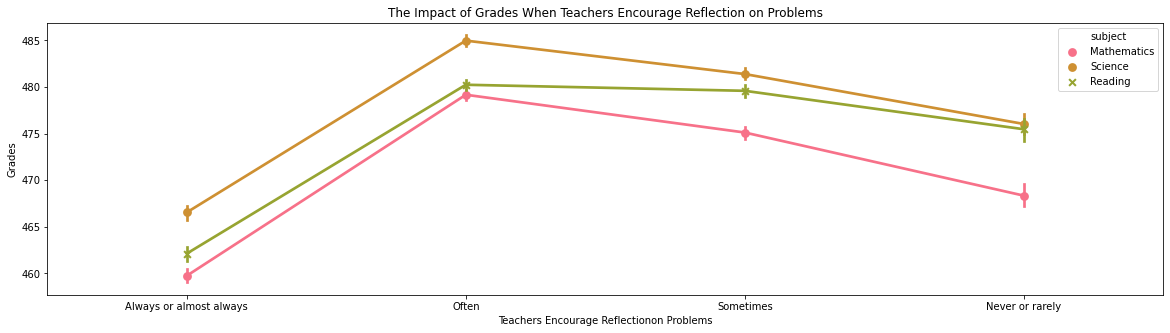

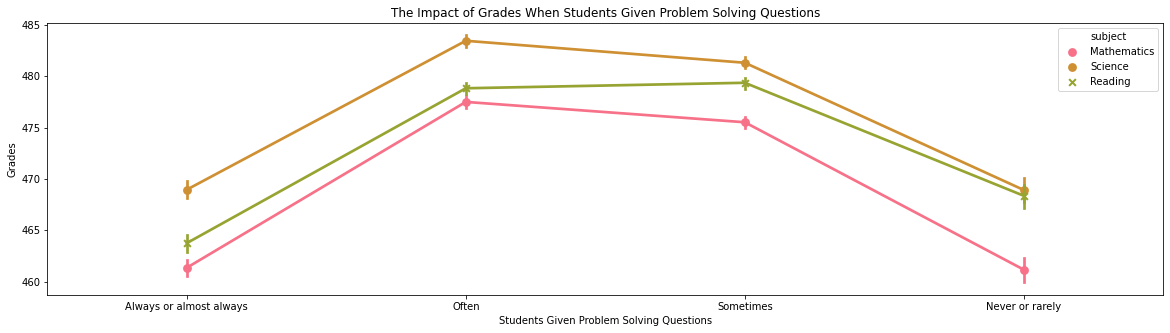

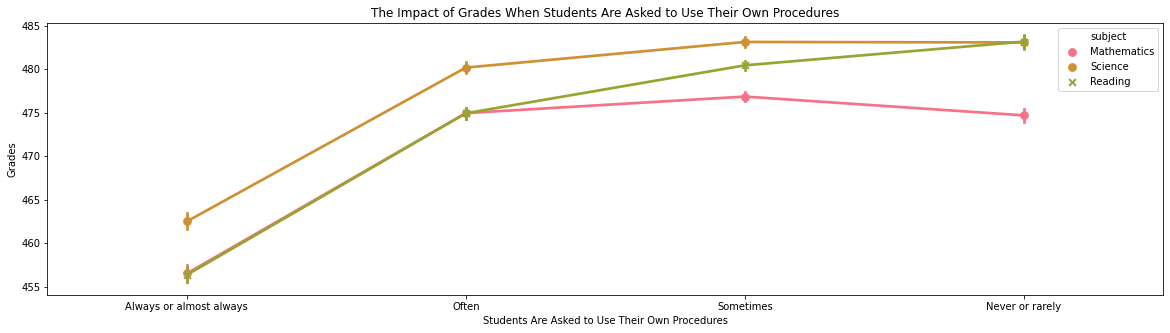

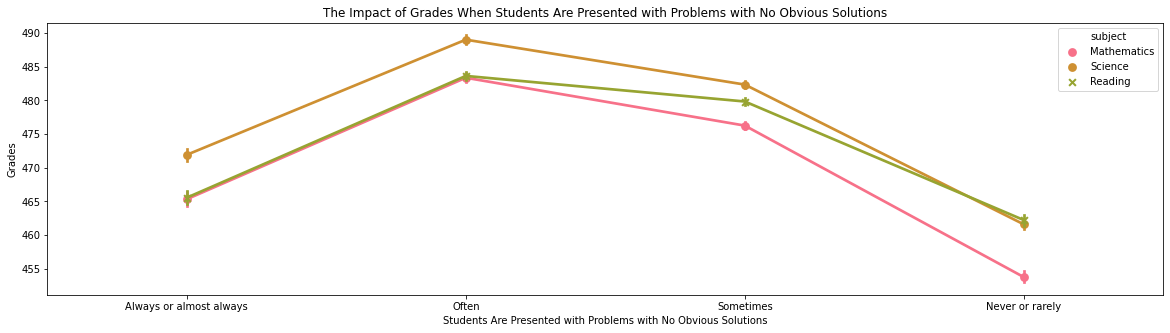

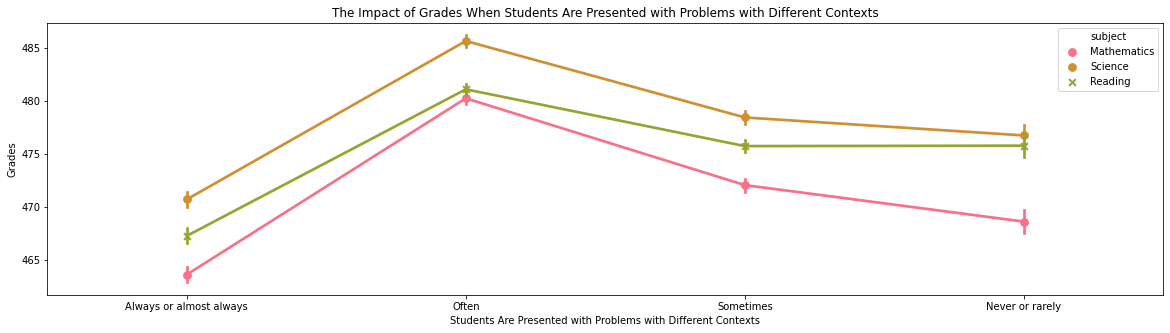

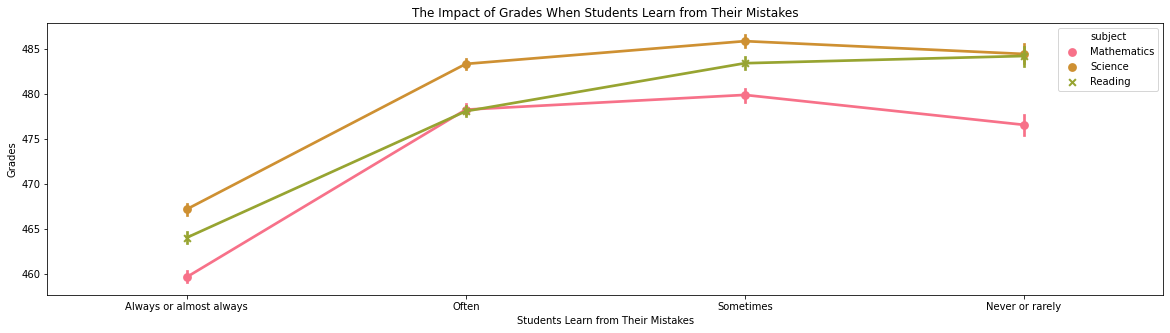

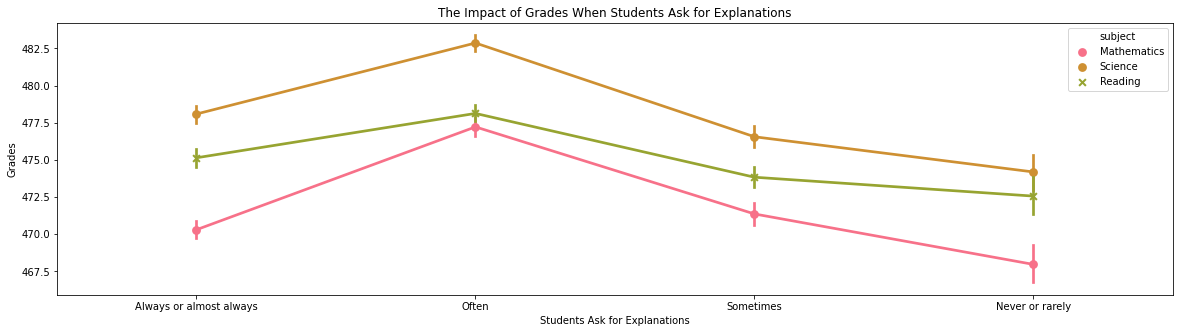

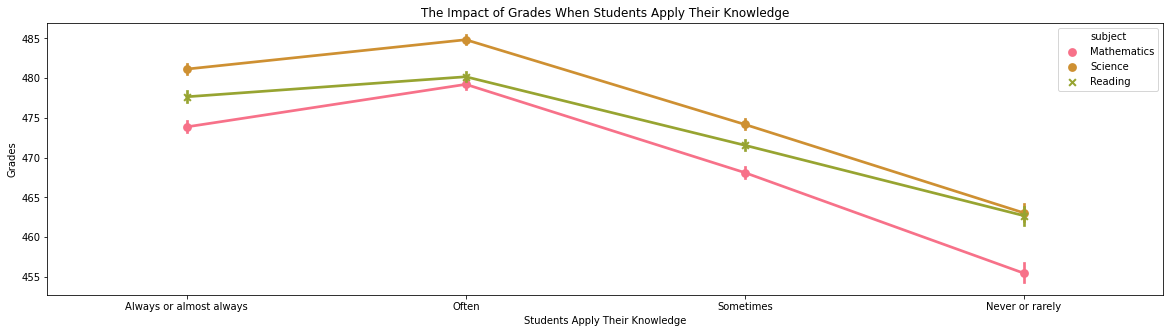

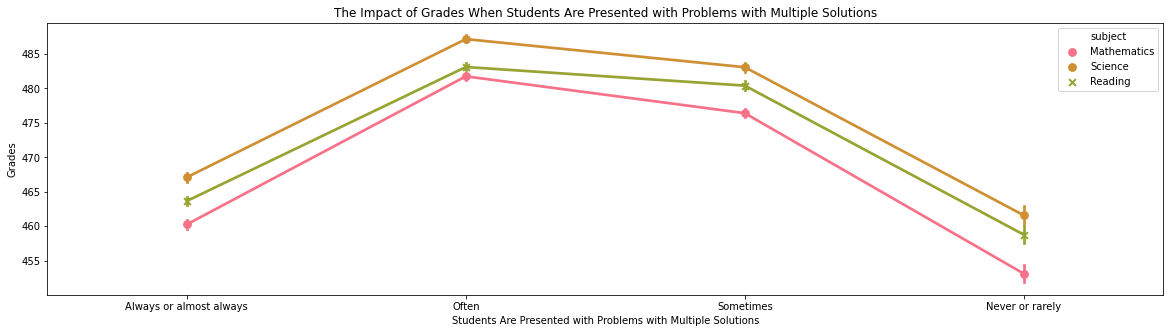

In [64]:
#create a series of line plots to investigate congitive activation and grades

def makegraph(xaxis,xlabel,title):
    fig, ax = plt.subplots(1, 1)
    ax = sb.pointplot(ax=ax, data = cog_activation, x = xaxis, y='grade', hue='subject', palette=sb.color_palette('husl', 8), 
                      markers=["o", "o","x"], linestyles=["-", "-", "-"])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Grades");

makegraph("teacher_encourage_reflection","Teachers Encourage Reflectionon Problems","The Impact of Grades When Teachers Encourage Reflection on Problems")
makegraph("problems_thinking","Students Given Problem Solving Questions","The Impact of Grades When Students Given Problem Solving Questions")
makegraph("own_procedures","Students Are Asked to Use Their Own Procedures","The Impact of Grades When Students Are Asked to Use Their Own Procedures")
makegraph("problems_no_obvious_solutions","Students Are Presented with Problems with No Obvious Solutions","The Impact of Grades When Students Are Presented with Problems with No Obvious Solutions")
makegraph("problems_different_contexts","Students Are Presented with Problems with Different Contexts","The Impact of Grades When Students Are Presented with Problems with Different Contexts")
makegraph("learn_mistakes","Students Learn from Their Mistakes","The Impact of Grades When Students Learn from Their Mistakes")
makegraph("asks_explanations","Students Ask for Explanations","The Impact of Grades When Students Ask for Explanations")
makegraph("applications","Students Apply Their Knowledge","The Impact of Grades When Students Apply Their Knowledge")
makegraph("problems_multiple_solutions","Students Are Presented with Problems with Multiple Solutions","The Impact of Grades When Students Are Presented with Problems with Multiple Solutions")

When teachers encourage relfection on all problems, the grades are lower compared to when this technique is used often or sometimes. This may be because if the students ponder on problems too much, they may not be able to go through the curriculum as fast as other students, which may reduce their overall grades. When students are given problem solving questions often or sometimes, they are more inclined to have better grades than students who always or never see problem solving questions. This is because if students were never exposed to these questions, they wouldn't know how to deal with them on a test. However, if they always see these problems, the class may be too difficult for them and might give up on the class. This coninsides with the next couple of graphs where students get better grades when they don't use their own procedures and if the solutions are quite obvious. This shows that students learn better through repetition and get taught everything they need to know. 
Interestingly, the students get better graades when they don't learn from their own mistakes and often ask for explanations, this shows how much students need to be guided through school subjects. Students do really well when they apply their knowledge from what they have learned from the curriculum. 

Now, we want to see how a sense of belonging in school affects the students' grades. 


#### Sense of Belonging and Grades

In [42]:
#create a dataframe for sense of belonging and grades

sense_bel_df = pd.melt(df_clean, id_vars=["student_ID","country","outsider","make_friends","belonging","feeling_awkard","liked","feeling_lonely","feeling_happy","ideal_school","satisfication"], 
               value_vars=["maths_avg","sci_avg","read_avg"], 
               var_name="subject", value_name='grade')
sense_bel_df['subject'] = sense_bel_df['subject'].replace("maths_avg", "Mathematics").replace("read_avg",'Reading').replace("sci_avg","Science")


In [43]:
#create ordered categorical data 

ordinal_var_dict = {'outsider': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                    'make_friends': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                    'belonging': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "liked": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "feeling_awkard": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "feeling_lonely": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "feeling_happy" : ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "ideal_school": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "satisfication": ['Strongly agree','Agree','Disagree','Strongly disagree']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    sense_bel_df[var] = sense_bel_df[var].astype(ordered_var)

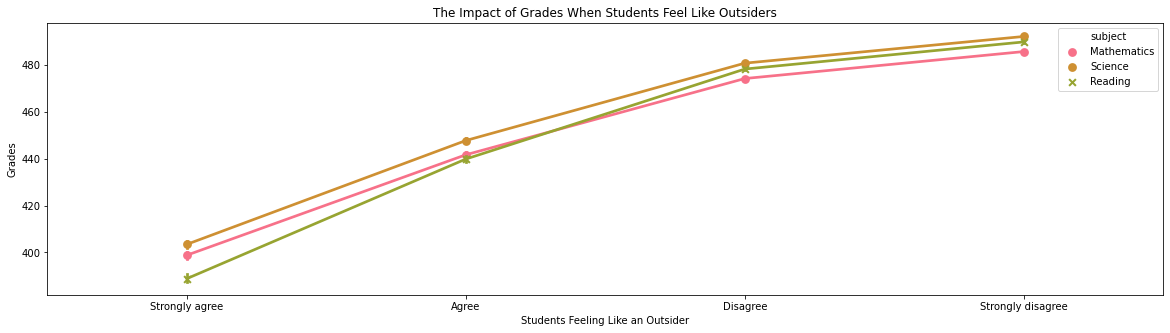

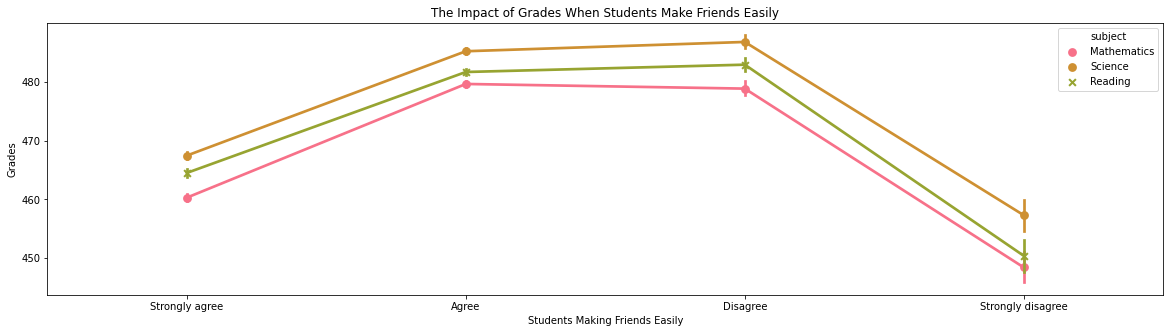

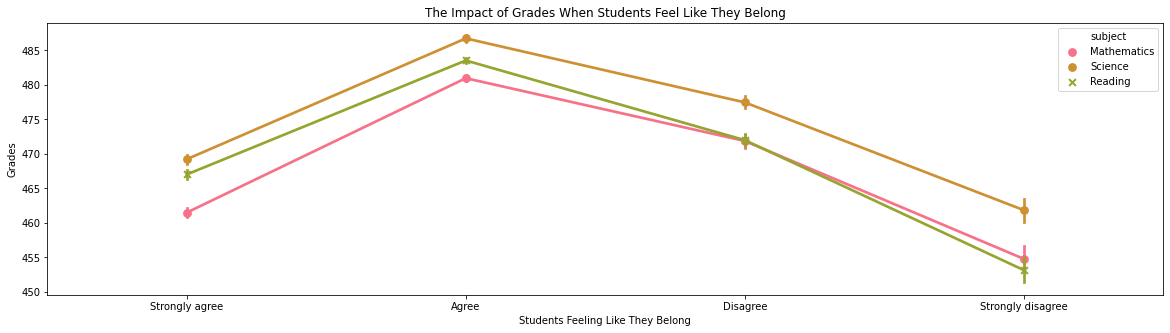

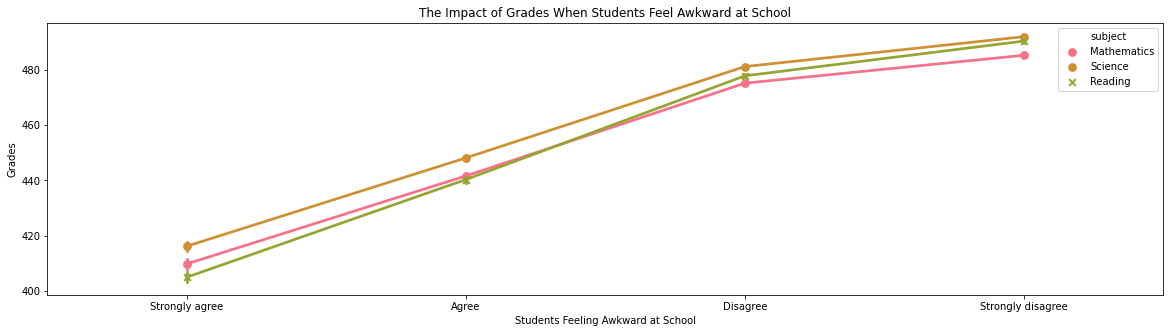

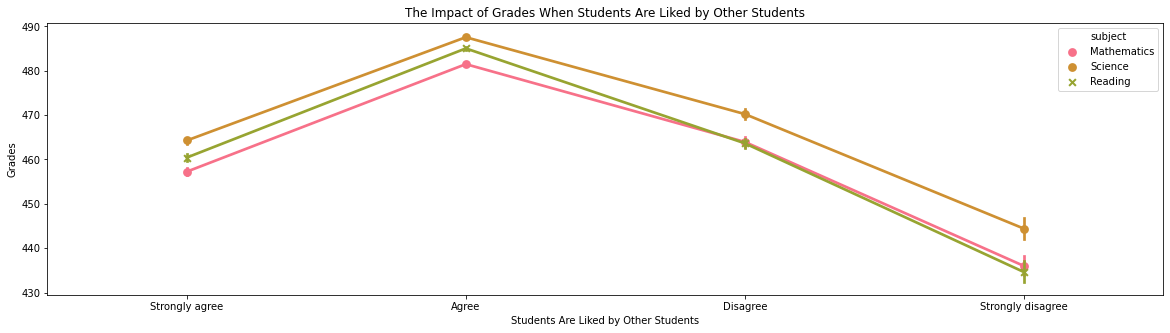

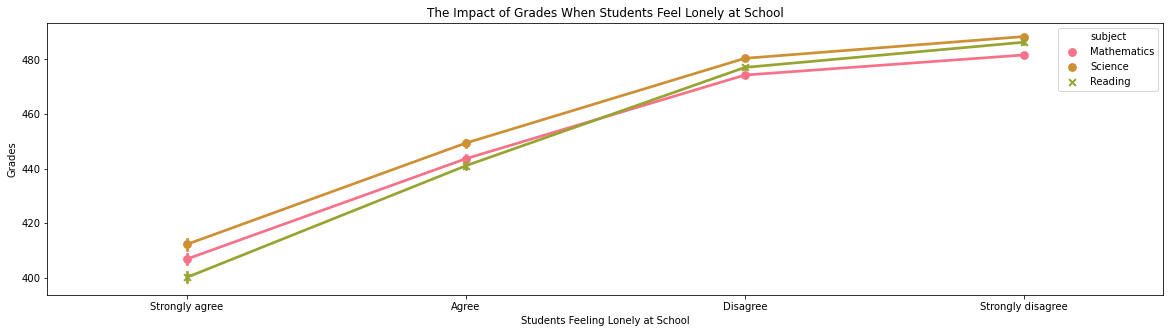

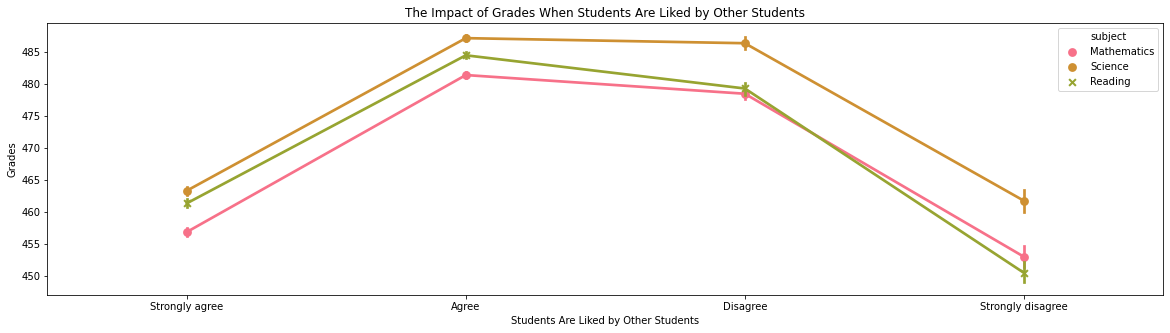

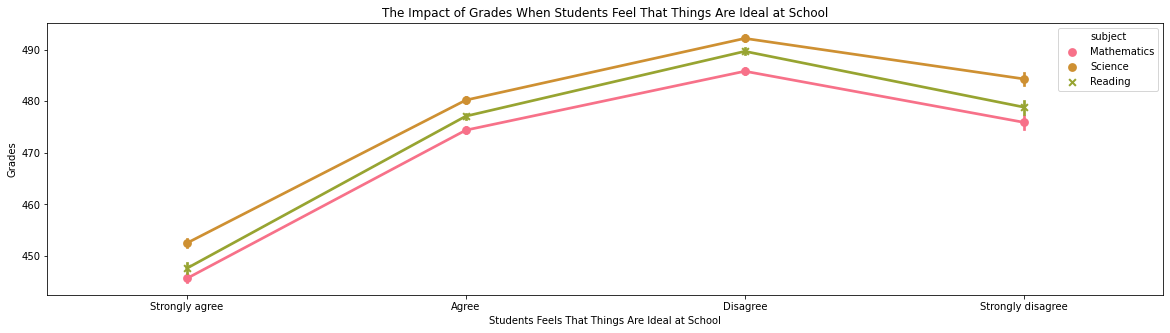

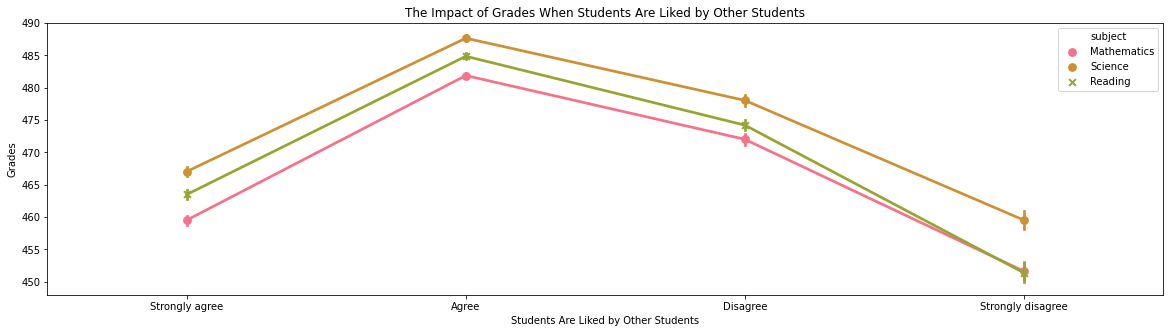

In [61]:
#create a series of line plots to investigate sense of belonging and grades 

def makegraph(xaxis,xlabel,title):
    fig, ax = plt.subplots(1, 1)
    ax = sb.pointplot(ax=ax, data = sense_bel_df, x = xaxis, y='grade', hue='subject', palette=sb.color_palette('husl', 8), 
                      markers=["o", "o","x"], linestyles=["-", "-", "-"])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Grades");

makegraph("outsider","Students Feeling Like an Outsider","The Impact of Grades When Students Feel Like Outsiders")
makegraph("make_friends","Students Making Friends Easily","The Impact of Grades When Students Make Friends Easily")
makegraph("belonging","Students Feeling Like They Belong","The Impact of Grades When Students Feel Like They Belong")
makegraph("feeling_awkard","Students Feeling Awkward at School","The Impact of Grades When Students Feel Awkward at School")
makegraph("liked","Students Are Liked by Other Students","The Impact of Grades When Students Are Liked by Other Students")
makegraph("feeling_lonely","Students Feeling Lonely at School","The Impact of Grades When Students Feel Lonely at School")
makegraph("feeling_happy","Students Are Liked by Other Students","The Impact of Grades When Students Are Liked by Other Students")
makegraph("ideal_school","Students Feels That Things Are Ideal at School","The Impact of Grades When Students Feel That Things Are Ideal at School")
makegraph("satisfication","Students Are Liked by Other Students","The Impact of Grades When Students Are Liked by Other Students")

When students don't feel like they are outsiders, awkward, or lonely at school, they have better grades than students who do feel this way. Those who don't make friends easily, who aren't liked by other students, or feel like they don't belong have poorer grades. This shows that the students who enjoy coming to school and feel at ease has a massive impact on their grades. However, those who strongly agree with being satisfied, feel that things are going well, being happy, and feel like they belong have lower grades than students who agree. This may be because the students may be complacent and/or they spend more time with friends than learning at school. 

Next, I want to investigate how their attitude towards school affects their grades. 



#### Attitude Towards School and Grades

In [45]:
#create a dataframe for attitude towards school and grades

attitude_df = pd.melt(df_clean, id_vars=["student_ID","country","little_prep","waste_time",
                                         "confidence","useful_job","helps_job","prep_college","enjoy_grades","try_hard"], 
               value_vars=["maths_avg","sci_avg","read_avg"], 
               var_name="subject", value_name='grade')
attitude_df['subject'] = attitude_df['subject'].replace("maths_avg", "Mathematics").replace("read_avg",'Reading').replace("sci_avg","Science")

In [46]:
#create ordered categorical data 

ordinal_var_dict = {'little_prep': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                    'waste_time': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                    'confidence': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "useful_job": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "helps_job": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "prep_college": ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "enjoy_grades" : ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   "try_hard": ['Strongly agree','Agree','Disagree','Strongly disagree']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    attitude_df[var] = attitude_df[var].astype(ordered_var)

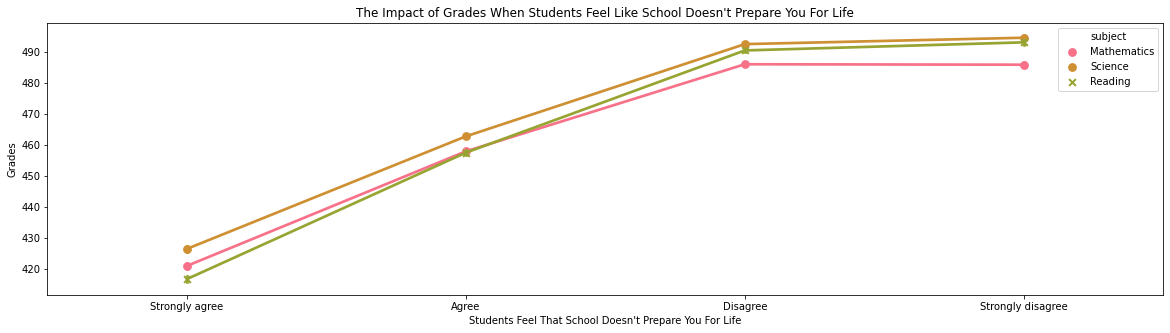

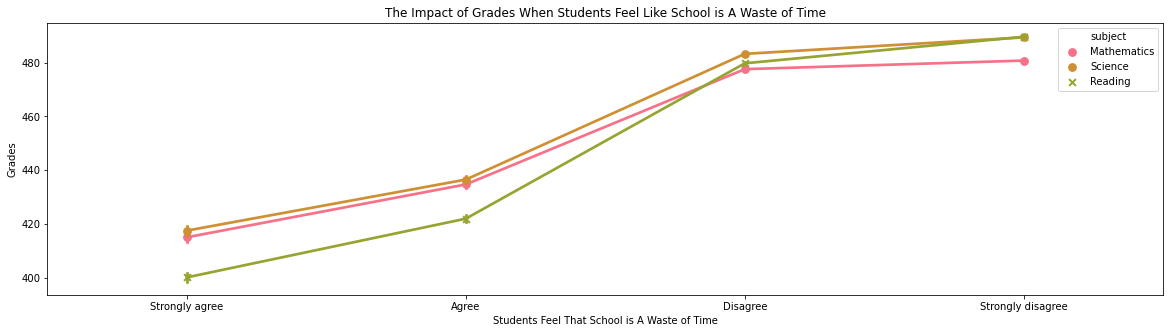

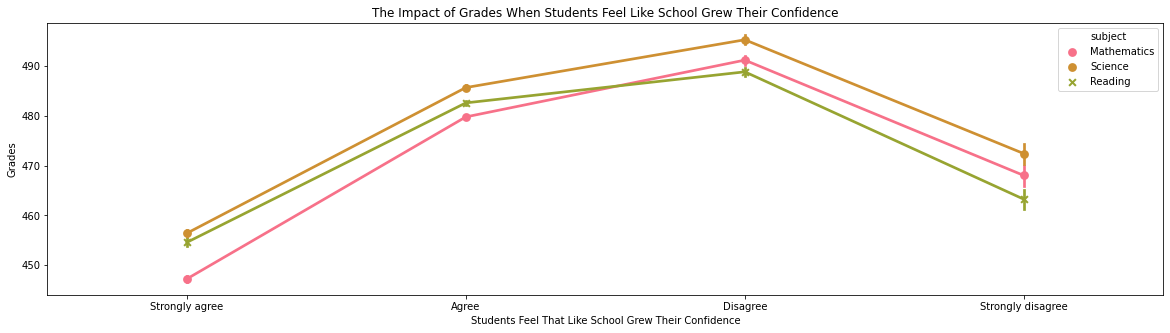

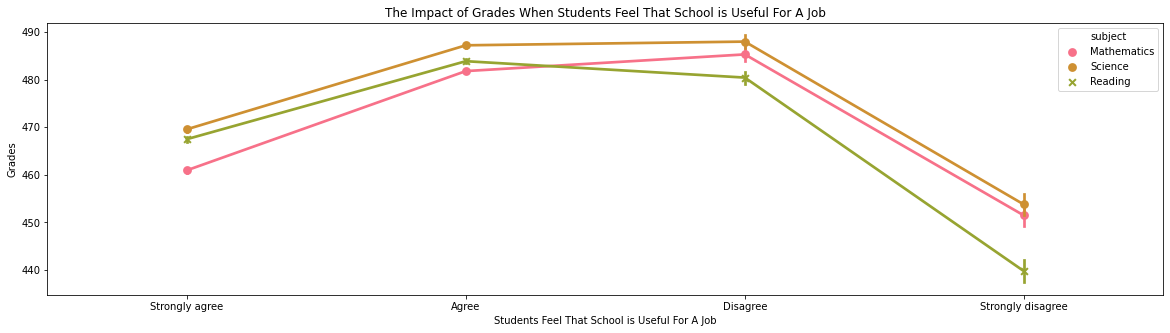

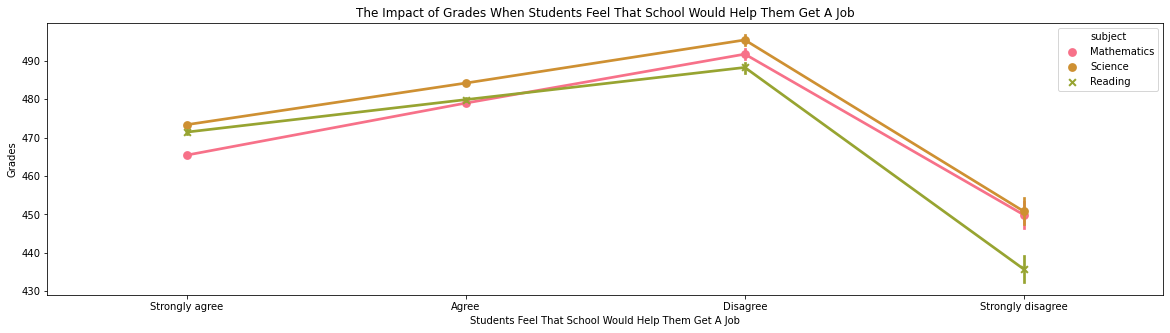

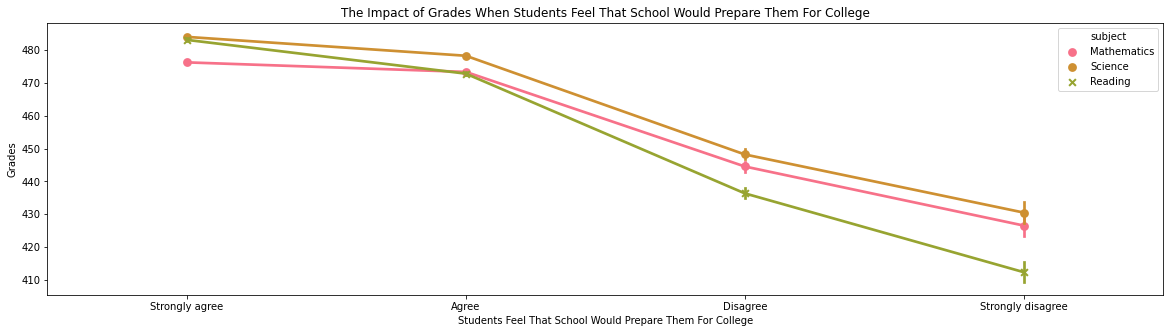

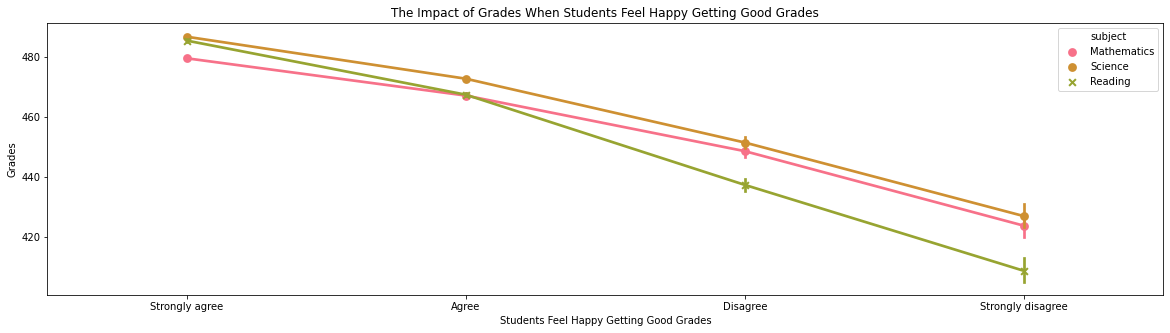

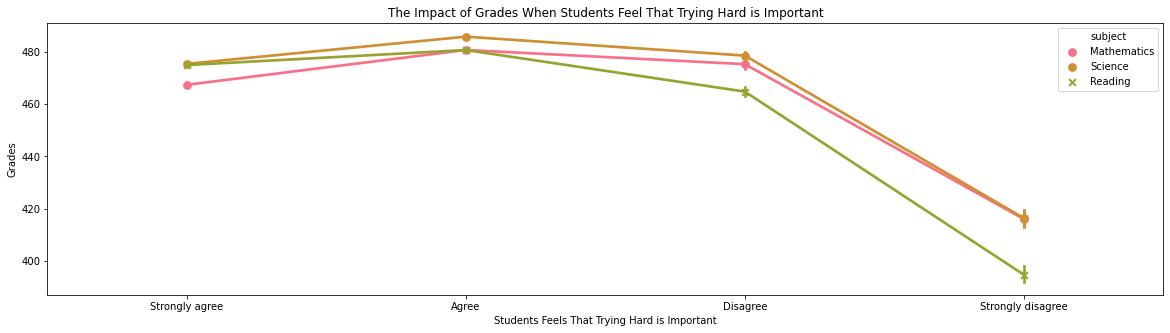

In [63]:
#create a series of line plots to investigate attitude towards school and grades 

def makegraph(xaxis,xlabel,title):
    fig, ax = plt.subplots(1, 1)
    ax = sb.pointplot(ax=ax, data = attitude_df, x = xaxis, y='grade', hue='subject', palette=sb.color_palette('husl', 8), 
                      markers=["o", "o","x"], linestyles=["-", "-", "-"])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Grades");

makegraph("little_prep","Students Feel That School Doesn't Prepare You For Life","The Impact of Grades When Students Feel Like School Doesn't Prepare You For Life")
makegraph("waste_time","Students Feel That School is A Waste of Time","The Impact of Grades When Students Feel Like School is A Waste of Time")
makegraph("confidence","Students Feel That Like School Grew Their Confidence","The Impact of Grades When Students Feel Like School Grew Their Confidence")
makegraph("useful_job","Students Feel That School is Useful For A Job","The Impact of Grades When Students Feel That School is Useful For A Job")
makegraph("helps_job","Students Feel That School Would Help Them Get A Job","The Impact of Grades When Students Feel That School Would Help Them Get A Job")
makegraph("prep_college","Students Feel That School Would Prepare Them For College","The Impact of Grades When Students Feel That School Would Prepare Them For College")
makegraph("enjoy_grades","Students Feel Happy Getting Good Grades","The Impact of Grades When Students Feel Happy Getting Good Grades")
makegraph("try_hard","Students Feels That Trying Hard is Important","The Impact of Grades When Students Feel That Trying Hard is Important")

Generally, when students have a good attitude towards school, they will have better grades. For example, when they feel like school prepares you for life, it isn't a waste of time, it is useful for their future, they feel happy getting good grades, and they believe that trying hard is important, they will have better grades than those who have a bad attitude towards school. 

Now, I would like to see how truancy affects grades. 



#### Truancy and Grades

In [55]:
#create a dataframe for truancy and grades

truancy_df = pd.melt(df_clean, id_vars=["student_ID", "country","gender", "late_for_school","skip_school","immigration"], 
               value_vars=["maths_avg","sci_avg","read_avg"], 
               var_name="subject", value_name='grade')
truancy_df['subject'] = truancy_df['subject'].replace("maths_avg", "Mathematics").replace("read_avg",'Reading').replace("sci_avg","Science")

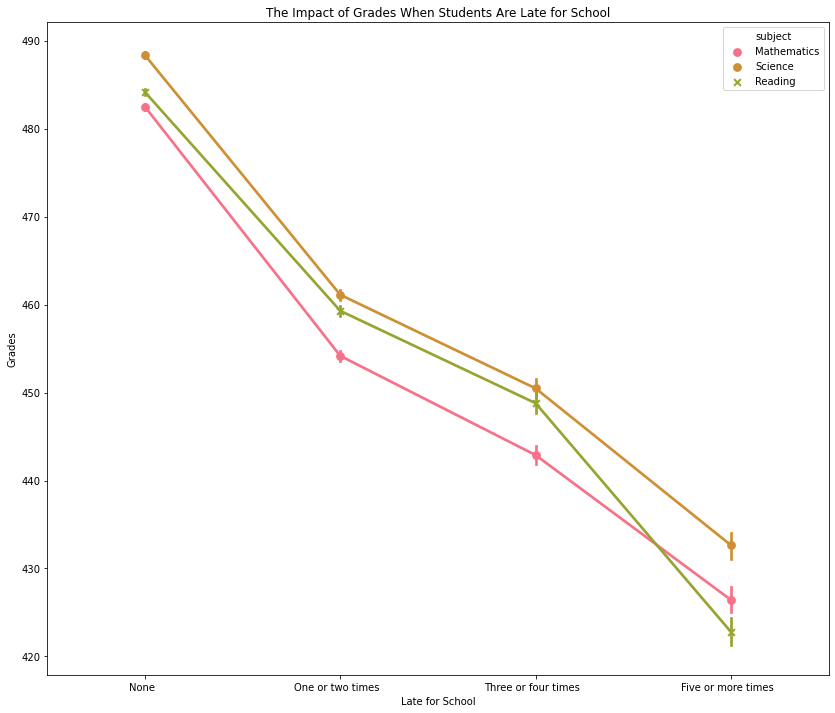

In [56]:
#create a line plot to investigate late for school and grades 

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

ax = sb.pointplot(ax=ax, data = truancy_df, 
                  x = 'late_for_school', y='grade', hue='subject', 
                  palette=sb.color_palette('husl', 8), 
                  markers=["o", "o","x"], linestyles=["-", "-", "-"])
plt.title("The Impact of Grades When Students Are Late for School")
plt.xlabel("Late for School")
plt.ylabel("Grades");

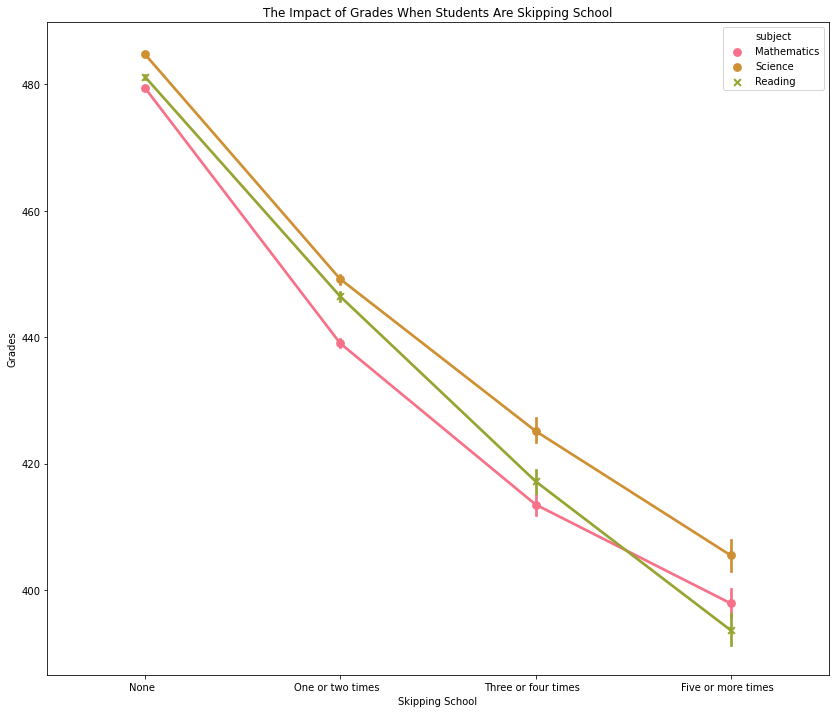

In [51]:
#create a line plot to investigate skip school and grades 

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

ax = sb.pointplot(ax=ax, data = truancy_df, 
                  x = 'skip_school', y='grade', hue='subject', 
                  palette=sb.color_palette('husl', 8), 
                  markers=["o", "o","x"], linestyles=["-", "-", "-"])
plt.title("The Impact of Grades When Students Are Skipping School")
plt.xlabel("Skipping School")
plt.ylabel("Grades");

It can be shown that skipping or being late for school has a negative impact upon students' grades. This is expected because students need to be taught and missing lessons would mean that the students would have to catch up on their own time. 

## Conclusion

It has been shown that there are slight differences in mathematics, science, and reading grades if the student is a different gender or immigration status. However, in general, these factors are not as important as the students' attitude towards school, how they learn, and how well they fit in school. Students are more prepared for life if they understand why school benefits them in the future and if they get along with their peers and are more sociable. 

It has been discovered that East Asian and North American countries perform better in various subjects and this may be due to their attitude towards school and the factors I have mentioned above. 

## Storage

In [52]:
#save the clean dataframe to use for explanatory analysis
df_clean.to_csv(r"C:\Users\Barry\Desktop\Udacity Project\df_clean.csv",index = False)